<a href="https://colab.research.google.com/github/snimale/ML-Learning/blob/master/ClassificationAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Going Through The Dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Car_Insurance.csv')

In [ ]:
df.head(3)

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0


In [ ]:
df.dtypes

ID                       int64
AGE                     object
GENDER                  object
RACE                    object
DRIVING_EXPERIENCE      object
EDUCATION               object
INCOME                  object
CREDIT_SCORE           float64
VEHICLE_OWNERSHIP      float64
VEHICLE_YEAR            object
MARRIED                float64
CHILDREN               float64
POSTAL_CODE              int64
ANNUAL_MILEAGE         float64
VEHICLE_TYPE            object
SPEEDING_VIOLATIONS      int64
DUIS                     int64
PAST_ACCIDENTS           int64
OUTCOME                float64
dtype: object

In [ ]:
df.drop(columns=['ID'], inplace=True)
df.head()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [ ]:
df.groupby('AGE').count()

,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
AGE,,,,,,,,,,,,,,,,,
16-25,2016,2016,2016,2016,2016,1813,2016,2016,2016,2016,2016,1806,2016,2016,2016,2016,2016
26-39,3063,3063,3063,3063,3063,2744,3063,3063,3063,3063,3063,2765,3063,3063,3063,3063,3063
40-64,2931,2931,2931,2931,2931,2644,2931,2931,2931,2931,2931,2677,2931,2931,2931,2931,2931
65+,1990,1990,1990,1990,1990,1817,1990,1990,1990,1990,1990,1795,1990,1990,1990,1990,1990


In [ ]:
df.groupby('RACE').count()

,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
RACE,,,,,,,,,,,,,,,,,
majority,9012,9012,9012,9012,9012,8113,9012,9012,9012,9012,9012,8136,9012,9012,9012,9012,9012
minority,988,988,988,988,988,905,988,988,988,988,988,907,988,988,988,988,988


In [ ]:
df.groupby('GENDER').count()

,AGE,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
GENDER,,,,,,,,,,,,,,,,,
female,5010,5010,5010,5010,5010,4506,5010,5010,5010,5010,5010,4541,5010,5010,5010,5010,5010
male,4990,4990,4990,4990,4990,4512,4990,4990,4990,4990,4990,4502,4990,4990,4990,4990,4990


In [ ]:
df.groupby('DRIVING_EXPERIENCE').count()

,AGE,GENDER,RACE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
DRIVING_EXPERIENCE,,,,,,,,,,,,,,,,,
0-9y,3530,3530,3530,3530,3530,3193,3530,3530,3530,3530,3530,3167,3530,3530,3530,3530,3530
10-19y,3299,3299,3299,3299,3299,2950,3299,3299,3299,3299,3299,2980,3299,3299,3299,3299,3299
20-29y,2119,2119,2119,2119,2119,1918,2119,2119,2119,2119,2119,1942,2119,2119,2119,2119,2119
30y+,1052,1052,1052,1052,1052,957,1052,1052,1052,1052,1052,954,1052,1052,1052,1052,1052


In [ ]:
df.isnull().sum()

AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

In [ ]:
df.groupby('VEHICLE_OWNERSHIP').count().index

Float64Index([0.0, 1.0], dtype='float64', name='VEHICLE_OWNERSHIP')

# Some Graph Analysis

<Axes: xlabel='DRIVING_EXPERIENCE'>

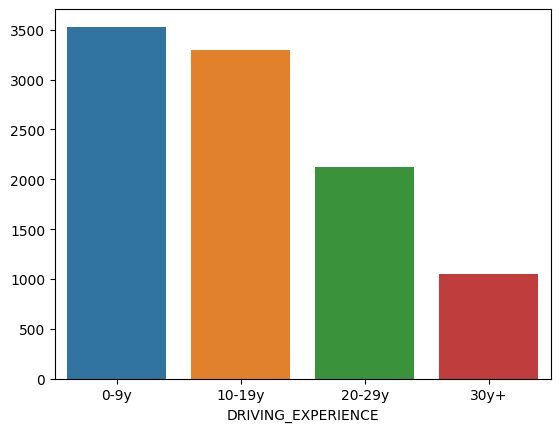

In [ ]:
sns.barplot(x=df.groupby('DRIVING_EXPERIENCE').count()['AGE'].index, y=np.array(df.groupby('DRIVING_EXPERIENCE').count()['AGE']))

<Axes: xlabel='DRIVING_EXPERIENCE'>

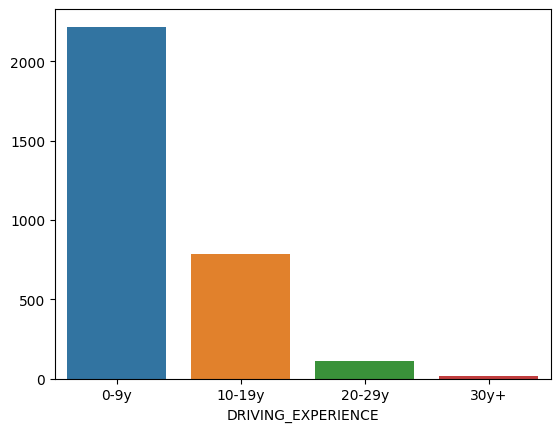

In [ ]:
sns.barplot(x=df.groupby('DRIVING_EXPERIENCE').count()['AGE'].index, y=np.array(df.loc[df['OUTCOME']==1].groupby('DRIVING_EXPERIENCE').count()['AGE']))

<Axes: xlabel='DRIVING_EXPERIENCE'>

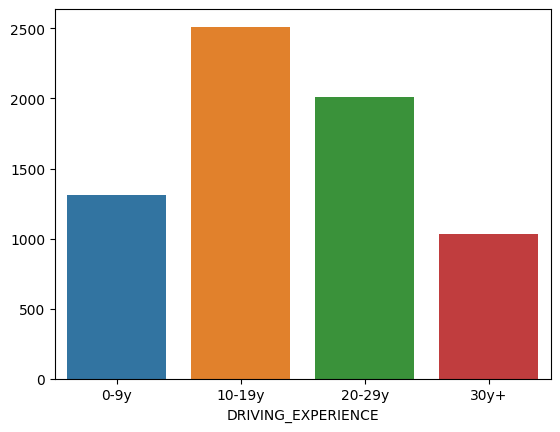

In [ ]:
sns.barplot(x=df.groupby('DRIVING_EXPERIENCE').count()['AGE'].index, y=np.array(df.loc[df['OUTCOME']==0].groupby('DRIVING_EXPERIENCE').count()['AGE']))

<ipython-input-16-2af366b0e523>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True);


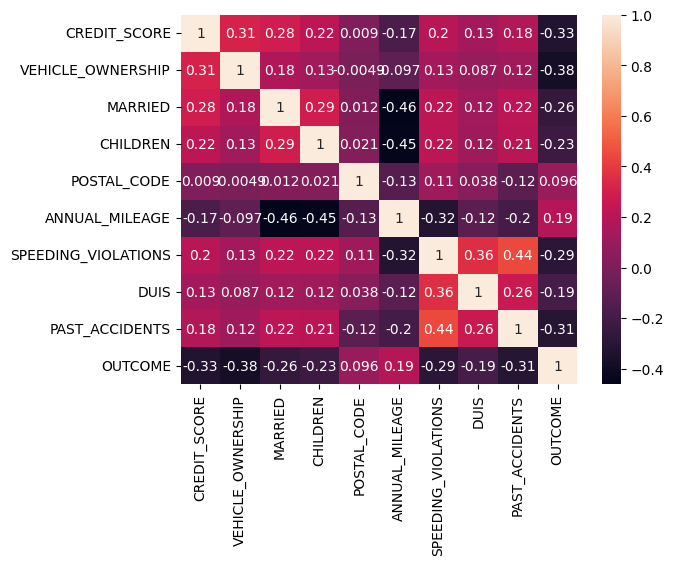

In [ ]:
sns.heatmap(df.corr(), annot=True);

Intresting insights:
more the speed violations, less the milage, makes sense sports cars
Vehicle ownership is directly related to credit score

# HANDLING NANS

### CREDIT_SCORE

In [ ]:
df.isnull().sum()

AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

In [ ]:
df['CREDIT_SCORE'].dtype

dtype('float64')

In [ ]:
df['CREDIT_SCORE'].describe()

count    9018.000000
mean        0.515813
std         0.137688
min         0.053358
25%         0.417191
50%         0.525033
75%         0.618312
max         0.960819
Name: CREDIT_SCORE, dtype: float64

looking at distribution

<Axes: xlabel='CREDIT_SCORE', ylabel='Count'>

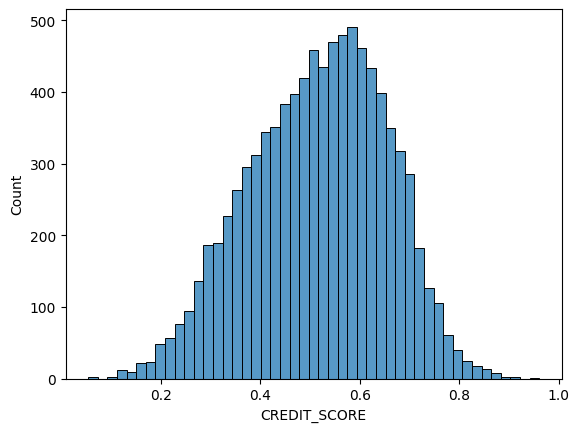

In [ ]:
sns.histplot(df['CREDIT_SCORE'])

In [ ]:
df2=df['CREDIT_SCORE'].copy()

In [ ]:
df2.loc[df2.isnull()]=df2.mean()

<Axes: xlabel='CREDIT_SCORE', ylabel='Count'>

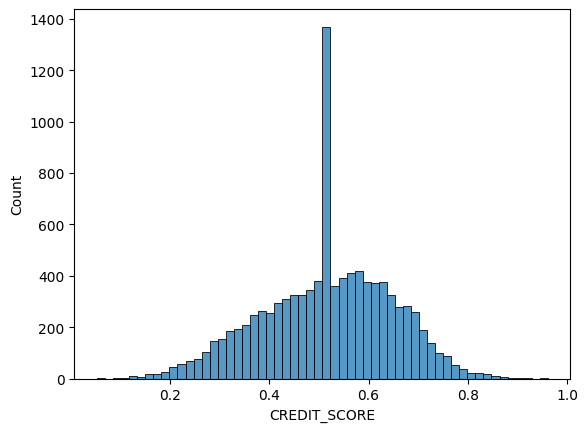

In [ ]:
sns.histplot(df2)

WE CANNOT REPLACE CREDIT SCORE BY MEAN OR MEDIAN OR MODE

WE MUST TRY BY SUB-ML MODEL, ELSE DROP

In [ ]:
df2=df['CREDIT_SCORE'].copy()

In [ ]:
from sklearn.linear_model import LinearRegression
trainX=df[['VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN']].loc[~df2.isnull()]
testX=df[['VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN']].loc[df2.isnull()]
trainY=df2.loc[~df2.isnull()]

In [ ]:
from sklearn import linear_model
lr = LinearRegression()
lr.fit(trainX, trainY)

LinearRegression()

In [ ]:
print(len(lr.predict(testX)))
print(len(df2.loc[df2.isnull()]))

982
982


In [ ]:
df2.loc[df2.isnull()]=lr.predict(testX)

<Axes: xlabel='CREDIT_SCORE', ylabel='Count'>

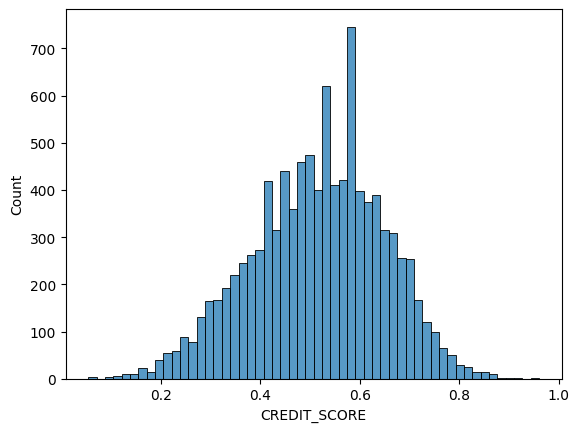

In [ ]:
sns.histplot(df2)

WORKS SO WELLLLLLL!!!!!!, LETZ GO

WE CHOOSE THE 3 PARAMETERS FOR LR BCOZ IN CORR MAP THEY MOST SIGNIFICANT

In [ ]:
df['CREDIT_SCORE']=df2

In [ ]:
df.isnull().sum()

AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE             0
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

### ANNUAL_MILEAGE

In [ ]:
df['ANNUAL_MILEAGE'].dtype

dtype('float64')

In [ ]:
df['ANNUAL_MILEAGE'].describe()

count     9043.000000
mean     11697.003207
std       2818.434528
min       2000.000000
25%      10000.000000
50%      12000.000000
75%      14000.000000
max      22000.000000
Name: ANNUAL_MILEAGE, dtype: float64

In [ ]:
df['ANNUAL_MILEAGE']=pd.read_csv('/content/drive/MyDrive/Datasets/Car_Insurance.csv')['ANNUAL_MILEAGE']

<Axes: xlabel='ANNUAL_MILEAGE', ylabel='Count'>

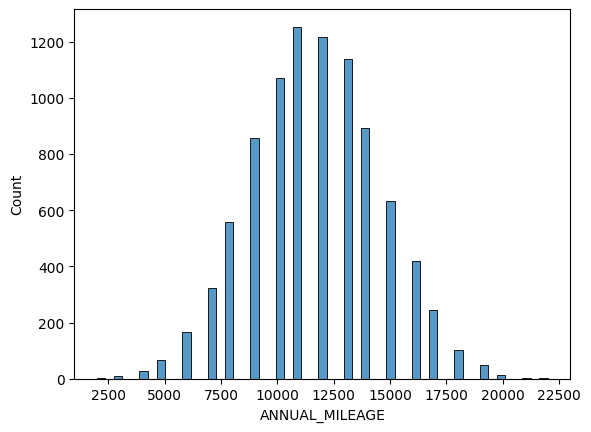

In [ ]:
df2=df['ANNUAL_MILEAGE'].copy()
sns.histplot(df2)

<Axes: xlabel='ANNUAL_MILEAGE', ylabel='Count'>

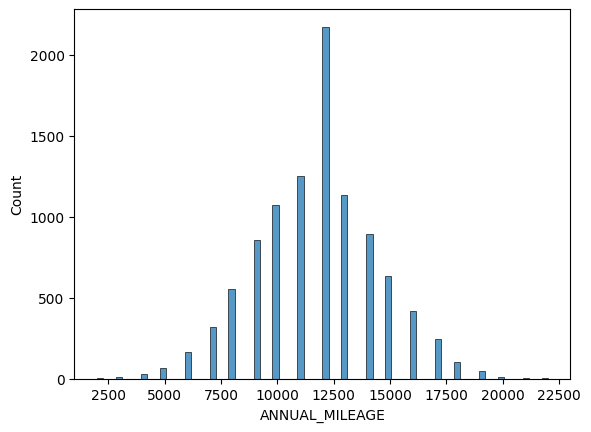

In [ ]:
df2.loc[df2.isnull()]=df2.median()
sns.histplot(df2)

<Axes: xlabel='ANNUAL_MILEAGE', ylabel='Count'>

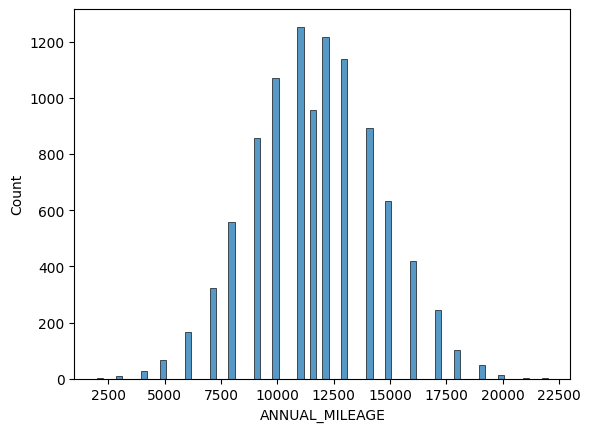

In [ ]:
df2=df['ANNUAL_MILEAGE'].copy()
df2.loc[df2.isnull()]=df2.mean()
sns.histplot(df2)

In [ ]:
df2=df['ANNUAL_MILEAGE'].copy()
from sklearn.linear_model import LinearRegression
trainX=df[['SPEEDING_VIOLATIONS', 'MARRIED', 'CHILDREN']].loc[~df2.isnull()]
testX=df[['SPEEDING_VIOLATIONS', 'MARRIED', 'CHILDREN']].loc[df2.isnull()]
trainY=df2.loc[~df2.isnull()]

In [ ]:
lr = LinearRegression()
lr.fit(trainX, trainY)

LinearRegression()

In [ ]:
df2.loc[df2.isnull()]=lr.predict(testX)

<Axes: xlabel='ANNUAL_MILEAGE', ylabel='Count'>

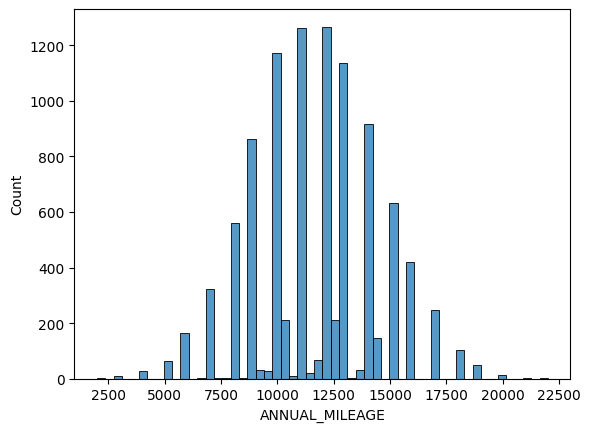

In [ ]:
sns.histplot(df2)

AGAIN WE OBSERVE THAT UPON USING REGRESSION FOR FILLING NAN VALUES, WE ATTAIN MORE EVENLY DISTRIBUTION

In [ ]:
df['ANNUAL_MILEAGE']=df2

In [ ]:
df.isnull().sum()

AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64

### POST-MISSING-VALUES-ANALYSIS

In [ ]:
df.describe()

,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,0.515511,0.697000,0.498200,0.688800,19864.548400,11697.695694,1.482900,0.23920,1.056300,0.313300
std,0.132017,0.459578,0.500022,0.463008,18915.613855,2727.572287,2.241966,0.55499,1.652454,0.463858
min,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,0.425515,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,0.524205,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,0.607607,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


<ipython-input-45-6dc1c4c1753e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

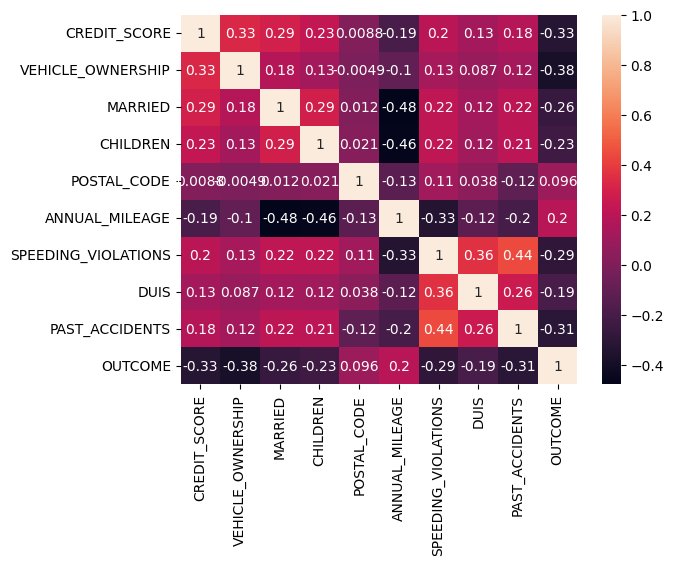

In [ ]:
sns.heatmap(df.corr(), annot=True)

# ENCODING

#### VEHICLE_TYPE

In [ ]:
df.groupby('VEHICLE_TYPE').count()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
VEHICLE_TYPE,,,,,,,,,,,,,,,,,
sedan,9523,9523,9523,9523,9523,9523,9523,9523,9523,9523,9523,9523,9523,9523,9523,9523,9523
sports car,477,477,477,477,477,477,477,477,477,477,477,477,477,477,477,477,477


In [ ]:
df.loc[df['VEHICLE_TYPE']=='sedan', 'VEHICLE_TYPE']=0

In [ ]:
df.loc[df['VEHICLE_TYPE']=='sports car', 'VEHICLE_TYPE']=1

In [ ]:
df.groupby('VEHICLE_TYPE').count()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
VEHICLE_TYPE,,,,,,,,,,,,,,,,,
0,9523,9523,9523,9523,9523,9523,9523,9523,9523,9523,9523,9523,9523,9523,9523,9523,9523
1,477,477,477,477,477,477,477,477,477,477,477,477,477,477,477,477,477


In [ ]:
df['VEHICLE_TYPE']=df['VEHICLE_TYPE'].astype('int64')

#### GENDER

In [ ]:
df.loc[df['GENDER']=='male', 'GENDER']=1

In [ ]:
df.loc[df['GENDER']=='female', 'GENDER']=0

In [ ]:
df.groupby('GENDER').count()

,AGE,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
GENDER,,,,,,,,,,,,,,,,,
0,5010,5010,5010,5010,5010,5010,5010,5010,5010,5010,5010,5010,5010,5010,5010,5010,5010
1,4990,4990,4990,4990,4990,4990,4990,4990,4990,4990,4990,4990,4990,4990,4990,4990,4990


In [ ]:
df['GENDER']=df['GENDER'].astype('int64')

#### RACE

In [ ]:
df['RACE']=pd.read_csv('/content/drive/MyDrive/Datasets/Car_Insurance.csv')['RACE']
df.loc[df['RACE']=='majority', 'RACE']=1

In [ ]:
df.loc[df['RACE']=='minority', 'RACE']=0

In [ ]:
df.groupby('RACE').count()

,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
RACE,,,,,,,,,,,,,,,,,
0,988,988,988,988,988,988,988,988,988,988,988,988,988,988,988,988,988
1,9012,9012,9012,9012,9012,9012,9012,9012,9012,9012,9012,9012,9012,9012,9012,9012,9012


In [ ]:
df['RACE']=df['RACE'].astype('int64')

#### EDUCATION

In [ ]:
df.groupby('EDUCATION').count()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
EDUCATION,,,,,,,,,,,,,,,,,
high school,4157,4157,4157,4157,4157,4157,4157,4157,4157,4157,4157,4157,4157,4157,4157,4157,4157
none,1915,1915,1915,1915,1915,1915,1915,1915,1915,1915,1915,1915,1915,1915,1915,1915,1915
university,3928,3928,3928,3928,3928,3928,3928,3928,3928,3928,3928,3928,3928,3928,3928,3928,3928


In [ ]:
df.loc[df['EDUCATION']=='none', 'EDUCATION']=0
df.loc[df['EDUCATION']=='high school', 'EDUCATION']=1
df.loc[df['EDUCATION']=='university', 'EDUCATION']=2

In [ ]:
df.groupby('EDUCATION').count()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
EDUCATION,,,,,,,,,,,,,,,,,
0,1915,1915,1915,1915,1915,1915,1915,1915,1915,1915,1915,1915,1915,1915,1915,1915,1915
1,4157,4157,4157,4157,4157,4157,4157,4157,4157,4157,4157,4157,4157,4157,4157,4157,4157
2,3928,3928,3928,3928,3928,3928,3928,3928,3928,3928,3928,3928,3928,3928,3928,3928,3928


In [ ]:
df['EDUCATION']=df['EDUCATION'].astype('int64')

#### INCOME

In [ ]:
df.groupby('INCOME').count()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
INCOME,,,,,,,,,,,,,,,,,
middle class,2138,2138,2138,2138,2138,2138,2138,2138,2138,2138,2138,2138,2138,2138,2138,2138,2138
poverty,1814,1814,1814,1814,1814,1814,1814,1814,1814,1814,1814,1814,1814,1814,1814,1814,1814
upper class,4336,4336,4336,4336,4336,4336,4336,4336,4336,4336,4336,4336,4336,4336,4336,4336,4336
working class,1712,1712,1712,1712,1712,1712,1712,1712,1712,1712,1712,1712,1712,1712,1712,1712,1712


In [ ]:
df.loc[df['INCOME']=='poverty', 'INCOME']=0
df.loc[df['INCOME']=='working class', 'INCOME']=1
df.loc[df['INCOME']=='middle class', 'INCOME']=2
df.loc[df['INCOME']=='upper class', 'INCOME']=3

In [ ]:
df.groupby('INCOME').count()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
INCOME,,,,,,,,,,,,,,,,,
0,1814,1814,1814,1814,1814,1814,1814,1814,1814,1814,1814,1814,1814,1814,1814,1814,1814
1,1712,1712,1712,1712,1712,1712,1712,1712,1712,1712,1712,1712,1712,1712,1712,1712,1712
2,2138,2138,2138,2138,2138,2138,2138,2138,2138,2138,2138,2138,2138,2138,2138,2138,2138
3,4336,4336,4336,4336,4336,4336,4336,4336,4336,4336,4336,4336,4336,4336,4336,4336,4336


In [ ]:
df['INCOME']=df['INCOME'].astype('int64')

#### VEHICLE YEAR

In [ ]:
df.groupby('VEHICLE_YEAR').count()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
VEHICLE_YEAR,,,,,,,,,,,,,,,,,
after 2015,3033,3033,3033,3033,3033,3033,3033,3033,3033,3033,3033,3033,3033,3033,3033,3033,3033
before 2015,6967,6967,6967,6967,6967,6967,6967,6967,6967,6967,6967,6967,6967,6967,6967,6967,6967


In [ ]:
df.loc[df['VEHICLE_YEAR']=='after 2015', 'VEHICLE_YEAR']=0
df.loc[df['VEHICLE_YEAR']=='before 2015', 'VEHICLE_YEAR']=1

In [ ]:
df.groupby('VEHICLE_YEAR').count()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
VEHICLE_YEAR,,,,,,,,,,,,,,,,,
0,3033,3033,3033,3033,3033,3033,3033,3033,3033,3033,3033,3033,3033,3033,3033,3033,3033
1,6967,6967,6967,6967,6967,6967,6967,6967,6967,6967,6967,6967,6967,6967,6967,6967,6967


In [ ]:
df['VEHICLE_YEAR']=df['VEHICLE_YEAR'].astype('int64')

#### DRIVING_EXPERIENCE

In [ ]:
df.groupby('DRIVING_EXPERIENCE').count()

,AGE,GENDER,RACE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
DRIVING_EXPERIENCE,,,,,,,,,,,,,,,,,
0-9y,3530,3530,3530,3530,3530,3530,3530,3530,3530,3530,3530,3530,3530,3530,3530,3530,3530
10-19y,3299,3299,3299,3299,3299,3299,3299,3299,3299,3299,3299,3299,3299,3299,3299,3299,3299
20-29y,2119,2119,2119,2119,2119,2119,2119,2119,2119,2119,2119,2119,2119,2119,2119,2119,2119
30y+,1052,1052,1052,1052,1052,1052,1052,1052,1052,1052,1052,1052,1052,1052,1052,1052,1052


In [ ]:
df.loc[df['DRIVING_EXPERIENCE']=='0-9y', 'DRIVING_EXPERIENCE']=0
df.loc[df['DRIVING_EXPERIENCE']=='10-19y', 'DRIVING_EXPERIENCE']=1
df.loc[df['DRIVING_EXPERIENCE']=='20-29y', 'DRIVING_EXPERIENCE']=2
df.loc[df['DRIVING_EXPERIENCE']=='30y+', 'DRIVING_EXPERIENCE']=3

In [ ]:
df.groupby('DRIVING_EXPERIENCE').count()

,AGE,GENDER,RACE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
DRIVING_EXPERIENCE,,,,,,,,,,,,,,,,,
0,3530,3530,3530,3530,3530,3530,3530,3530,3530,3530,3530,3530,3530,3530,3530,3530,3530
1,3299,3299,3299,3299,3299,3299,3299,3299,3299,3299,3299,3299,3299,3299,3299,3299,3299
2,2119,2119,2119,2119,2119,2119,2119,2119,2119,2119,2119,2119,2119,2119,2119,2119,2119
3,1052,1052,1052,1052,1052,1052,1052,1052,1052,1052,1052,1052,1052,1052,1052,1052,1052


In [ ]:
df['DRIVING_EXPERIENCE']=df['DRIVING_EXPERIENCE'].astype('int64')

#### AGE

In [ ]:
df.groupby('AGE').count()

,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
AGE,,,,,,,,,,,,,,,,,
16-25,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016
26-39,3063,3063,3063,3063,3063,3063,3063,3063,3063,3063,3063,3063,3063,3063,3063,3063,3063
40-64,2931,2931,2931,2931,2931,2931,2931,2931,2931,2931,2931,2931,2931,2931,2931,2931,2931
65+,1990,1990,1990,1990,1990,1990,1990,1990,1990,1990,1990,1990,1990,1990,1990,1990,1990


In [ ]:
df.loc[df['AGE']=='16-25', 'AGE']=0
df.loc[df['AGE']=='26-39', 'AGE']=1
df.loc[df['AGE']=='40-64', 'AGE']=2
df.loc[df['AGE']=='65+', 'AGE']=3

In [ ]:
df.groupby('AGE').count()

,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
AGE,,,,,,,,,,,,,,,,,
0,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016
1,3063,3063,3063,3063,3063,3063,3063,3063,3063,3063,3063,3063,3063,3063,3063,3063,3063
2,2931,2931,2931,2931,2931,2931,2931,2931,2931,2931,2931,2931,2931,2931,2931,2931,2931
3,1990,1990,1990,1990,1990,1990,1990,1990,1990,1990,1990,1990,1990,1990,1990,1990,1990


In [ ]:
df['AGE']=df['AGE'].astype('int64')

#### Vehicle Ownership

In [ ]:
df['VEHICLE_OWNERSHIP']=df['VEHICLE_OWNERSHIP'].astype('int64')

#### CHILDERN

In [ ]:
df['CHILDREN']=df['CHILDREN'].astype('int64')

#### MARRIED

In [ ]:
df['MARRIED']=df['MARRIED'].astype('int64')

#### ANNUAL_MILEAGE

In [ ]:
df['ANNUAL_MILEAGE']=df['ANNUAL_MILEAGE'].astype('int64')

#### POSTAL_CODE

In [ ]:
df.groupby('POSTAL_CODE').count()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
POSTAL_CODE,,,,,,,,,,,,,,,,,
10238,6940,6940,6940,6940,6940,6940,6940,6940,6940,6940,6940,6940,6940,6940,6940,6940,6940
21217,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120
32765,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456
92101,484,484,484,484,484,484,484,484,484,484,484,484,484,484,484,484,484


In [ ]:
df.loc[df['POSTAL_CODE']==10238, 'POSTAL_CODE']=0
df.loc[df['POSTAL_CODE']==21217, 'POSTAL_CODE']=1
df.loc[df['POSTAL_CODE']==32765, 'POSTAL_CODE']=2
df.loc[df['POSTAL_CODE']==92101, 'POSTAL_CODE']=3

In [ ]:
df.groupby('POSTAL_CODE').count()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
POSTAL_CODE,,,,,,,,,,,,,,,,,
0,6940,6940,6940,6940,6940,6940,6940,6940,6940,6940,6940,6940,6940,6940,6940,6940,6940
1,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120
2,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456
3,484,484,484,484,484,484,484,484,484,484,484,484,484,484,484,484,484


#### A LOOK AT DATA

In [ ]:
df.head(6)

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,3,0,1,0,1,3,0.629027,1,0,0,1,0,12000,0,0,0,0,0.0
1,0,1,1,0,0,0,0.357757,0,1,0,0,0,16000,0,0,0,0,1.0
2,0,0,1,0,1,1,0.493146,1,1,0,0,0,11000,0,0,0,0,0.0
3,0,1,1,0,2,1,0.206013,1,1,0,1,2,11000,0,0,0,0,0.0
4,1,1,1,1,0,1,0.388366,1,1,0,0,2,12000,0,2,0,1,1.0
5,2,0,1,2,1,3,0.619127,1,0,0,1,0,13000,0,3,0,3,0.0


In [ ]:
df.dtypes

AGE                      int64
GENDER                   int64
RACE                     int64
DRIVING_EXPERIENCE       int64
EDUCATION                int64
INCOME                   int64
CREDIT_SCORE           float64
VEHICLE_OWNERSHIP        int64
VEHICLE_YEAR             int64
MARRIED                  int64
CHILDREN                 int64
POSTAL_CODE              int64
ANNUAL_MILEAGE           int64
VEHICLE_TYPE             int64
SPEEDING_VIOLATIONS      int64
DUIS                     int64
PAST_ACCIDENTS           int64
OUTCOME                float64
dtype: object

# HANDLING OUTLIERS

#### CREDIT_SCORE

<Axes: xlabel='CREDIT_SCORE', ylabel='Count'>

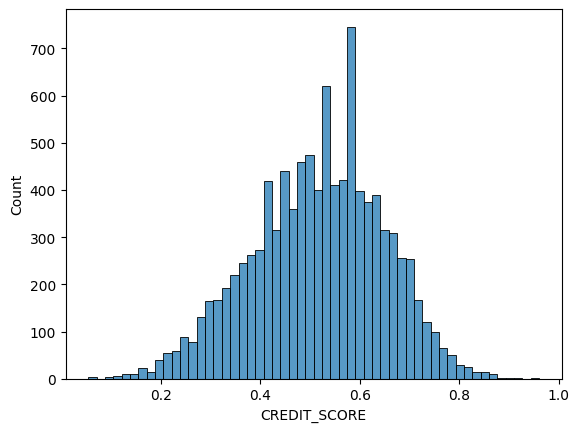

In [ ]:
sns.histplot(df['CREDIT_SCORE'])

In [ ]:
df.drop(df.loc[(abs((df['CREDIT_SCORE']-df['CREDIT_SCORE'].mean())/df['CREDIT_SCORE'].std()))>3].index, inplace=True)

<Axes: xlabel='CREDIT_SCORE', ylabel='Count'>

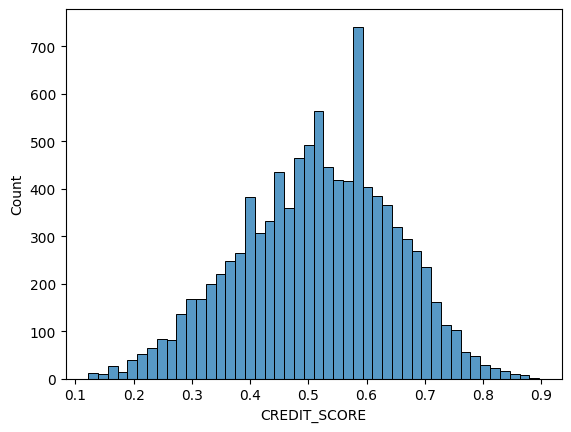

In [ ]:
sns.histplot(df['CREDIT_SCORE'])

#### ANNUAL_MILEAGE

<Axes: xlabel='ANNUAL_MILEAGE', ylabel='Count'>

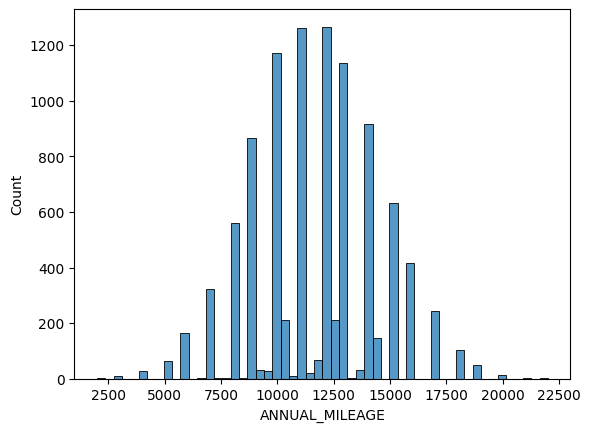

In [ ]:
sns.histplot(df['ANNUAL_MILEAGE'])

In [ ]:
df.drop(index=df.loc[abs((df['ANNUAL_MILEAGE']-df['ANNUAL_MILEAGE'].mean())/df['ANNUAL_MILEAGE'].std())>3].index, inplace=True)

<Axes: xlabel='ANNUAL_MILEAGE', ylabel='Count'>

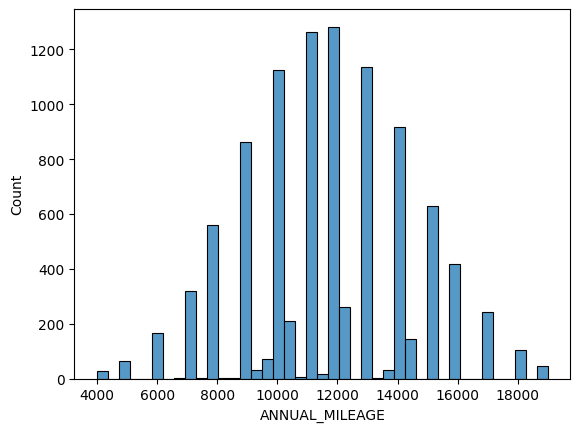

In [ ]:
sns.histplot(df['ANNUAL_MILEAGE'])

#### CHECK LATER IF THERE IS NEED TO HANDLE THIS OUTLIERS

##### SPEEDING_VIOLATIONS

<Axes: xlabel='SPEEDING_VIOLATIONS', ylabel='Count'>

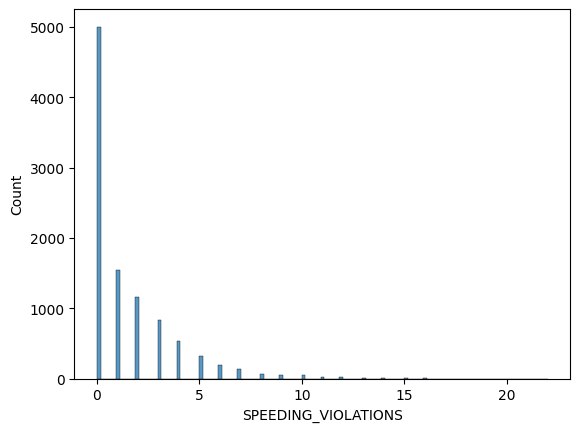

In [ ]:
sns.histplot(df['SPEEDING_VIOLATIONS'])

##### DUIS

<Axes: xlabel='DUIS', ylabel='Count'>

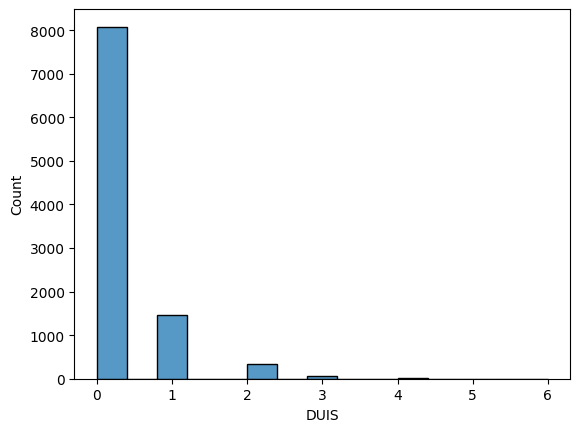

In [ ]:
sns.histplot(df['DUIS'])

##### PAST_ACCIDENTS

<Axes: xlabel='PAST_ACCIDENTS', ylabel='Count'>

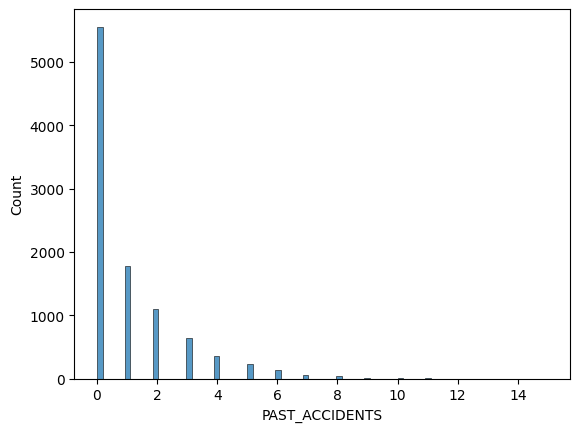

In [ ]:
sns.histplot(df['PAST_ACCIDENTS'])

# Analysis for further processing

In [ ]:
# first  saving in drive
df.to_excel('/content/drive/MyDrive/Datasets/Car_Insurance1.xlsx')

<Axes: >

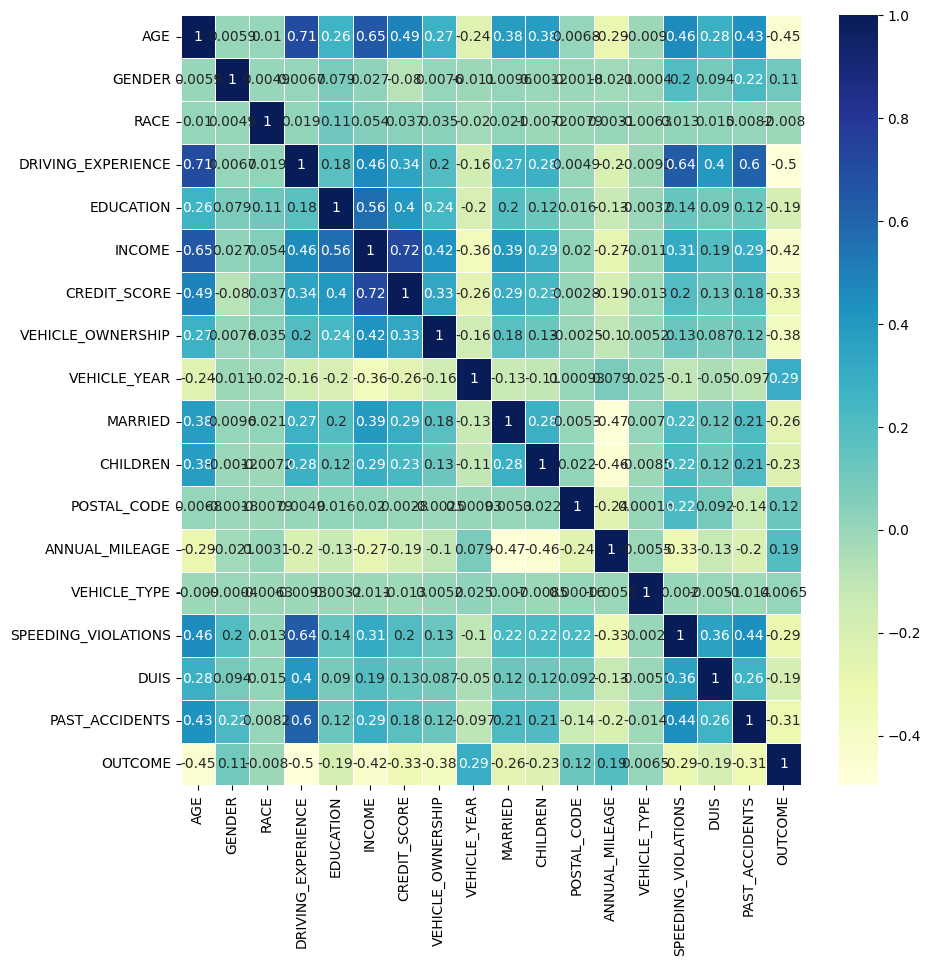

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax, cmap='YlGnBu')

# DROPPING SOME COLUMNS

In [ ]:
# we can see race column has 0.008 corr with outcome i.e. its not really related

In [ ]:
df.drop(columns='RACE', inplace=True)

### Further drop here if needed to improve accuracies

# STANDARDIZATION

In [ ]:
from sklearn.model_selection import train_test_split
df.reset_index(inplace=True, drop=True)

In [ ]:
X=df.iloc[:, :-1]
y=df['OUTCOME']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=19, test_size=0.25)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler1 = MinMaxScaler()
scaler2 = StandardScaler()
min_max_columns=['AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 'VEHICLE_OWNERSHIP',
                'VEHICLE_YEAR', 'MARRIED', 'CHILDREN', 'POSTAL_CODE', 'VEHICLE_TYPE', 'SPEEDING_VIOLATIONS',
                'DUIS', 'PAST_ACCIDENTS']
standard_columns=['CREDIT_SCORE', 'ANNUAL_MILEAGE']


scaler1.fit(Xtrain[min_max_columns])
scaler2.fit(Xtrain[standard_columns])

StandardScaler()

In [ ]:
scaled_Xtrain = Xtrain.copy()
scaled_Xtrain[min_max_columns] = scaler1.transform(Xtrain[min_max_columns])
scaled_Xtrain[standard_columns] = scaler2.transform(Xtrain[standard_columns])

In [ ]:
scaled_Xtrain.head(3)

,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS
8661,0.333333,0.0,0.0,1.0,1.000000,1.497331,1.0,1.0,1.0,0.0,0.666667,-0.630893,0.0,0.000000,0.000000,0.000000
4784,1.000000,1.0,1.0,0.0,1.000000,-0.476801,1.0,1.0,1.0,1.0,0.000000,-1.382586,0.0,0.352941,0.333333,0.266667
9669,0.333333,1.0,0.0,1.0,0.666667,0.196736,1.0,0.0,0.0,1.0,0.000000,1.248340,0.0,0.000000,0.000000,0.000000


In [ ]:
scaled_Xtest = Xtest.copy()
scaled_Xtest[min_max_columns] = scaler1.transform(Xtest[min_max_columns])
scaled_Xtest[standard_columns] = scaler2.transform(Xtest[standard_columns])

In [ ]:
scaled_Xtest.head(3)

,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS
4688,0.333333,0.0,0.333333,1.0,1.000000,-0.208331,1.0,1.0,1.0,1.0,0.000000,1.248340,0.0,0.058824,0.0,0.066667
680,0.333333,0.0,0.333333,0.5,0.666667,0.500254,0.0,1.0,1.0,0.0,0.666667,0.496647,0.0,0.117647,0.0,0.000000
9485,0.000000,1.0,0.000000,0.5,0.000000,-1.551799,0.0,1.0,0.0,1.0,0.000000,-1.006739,0.0,0.000000,0.0,0.000000


# KNN

In [ ]:
from math import sqrt
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=int(sqrt(len(ytrain)))+1)
classifier.fit(Xtrain, ytrain)

KNeighborsClassifier(n_neighbors=87)

In [ ]:
ytestPred = classifier.predict(Xtest)

#### Grading

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
confusion_matrix(ytest, ytestPred)

array([[1492,  209],
       [ 312,  476]])

In [ ]:
f1_score(ytest, ytestPred)

0.6463000678886626

In [ ]:
accuracy_score(ytest, ytestPred)

0.7906789875451988

In [ ]:
cm=confusion_matrix(ytest, ytestPred)
print("Precision: ", cm[0, 0]/(cm[1, 0]+cm[0, 0]))
print("NPV: ", cm[1, 1]/(cm[1, 1]+cm[0, 1]))
print("Specificity: ", cm[1, 1]/(cm[1, 1]+cm[1, 0]))
print("Sensitivity/Recall: ", cm[0, 0]/(cm[0, 0]+cm[0, 1]))

Precision:  0.8270509977827051
NPV:  0.6948905109489051
Specificity:  0.6040609137055838
Sensitivity/Recall:  0.8771310993533216


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
from sklearn.model_selection import cross_val_score
accuries = cross_val_score(estimator = classifier, X = Xtrain, y = ytrain, cv=10)
print(accuries)
print(accuries.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0.82463186 0.85943775 0.82463186 0.76706827 0.78179384 0.82998661
 0.76572959 0.84450402 0.80428954 0.79758713]
0.8099660482860844


Grading

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(Xtrain, ytrain)
ytestPred = classifier.predict(Xtest)

In [ ]:
print(confusion_matrix(ytest, ytestPred))

[[1495  206]
 [ 301  487]]


In [ ]:
print(f1_score(ytest, ytestPred))

0.6576637407157326


In [ ]:
print(accuracy_score(ytest, ytestPred))

0.7963037364403375


In [ ]:
cm=confusion_matrix(ytest, ytestPred)
print("Precision: ", cm[0, 0]/(cm[1, 0]+cm[0, 0]))
print("NPV: ", cm[1, 1]/(cm[1, 1]+cm[0, 1]))
print("Specificity: ", cm[1, 1]/(cm[1, 1]+cm[1, 0]))
print("Sensitivity/Recall: ", cm[0, 0]/(cm[0, 0]+cm[0, 1]))

Precision:  0.8324053452115813
NPV:  0.7027417027417028
Specificity:  0.618020304568528
Sensitivity/Recall:  0.8788947677836567


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=10)

In [ ]:
classifier.fit(Xtrain, ytrain)

DecisionTreeClassifier(criterion='entropy', random_state=10)

In [ ]:
y_pred_test = classifier.predict(Xtest)

In [ ]:
cm = confusion_matrix(ytest, y_pred_test)

In [ ]:
f1_score(ytest, y_pred_test)

0.6720597386434349

In [ ]:
accuracy_score(ytest, y_pred_test)

0.7882683808758537

In [ ]:
print("Precision: ", cm[0, 0]/(cm[1, 0]+cm[0, 0]))
print("NPV: ", cm[1, 1]/(cm[1, 1]+cm[0, 1]))
print("Specificity: ", cm[1, 1]/(cm[1, 1]+cm[1, 0]))
print("Sensitivity/Recall: ", cm[0, 0]/(cm[0, 0]+cm[0, 1]))

Precision:  0.8514970059880239
NPV:  0.6593406593406593
Specificity:  0.6852791878172588
Sensitivity/Recall:  0.8359788359788359


# Random Forests

#### Finding best no of estimators

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
maxAccuracy=0
maxAccuracyIndex=0
maxF1=0
maxF1Idx=0
for i in range(1, 101):
  classifier = RandomForestClassifier(n_estimators=i, criterion='gini', random_state=7)
  classifier.fit(Xtrain, ytrain)
  y_pred_test = classifier.predict(Xtest)
  accuracy = accuracy_score(ytest, y_pred_test)
  f1 = f1_score(ytest, y_pred_test)
  if(accuracy>maxAccuracy):
    maxAccuracy=accuracy
    maxAccuracyIndex=i
  if(f1>maxF1):
    maxF1=f1
    maxF1Index=i

In [ ]:
print(maxAccuracyIndex)
print(maxF1Index)

50
51


#### for 50

In [ ]:
classifier = RandomForestClassifier(n_estimators=50, criterion='gini', random_state=7)
classifier.fit(Xtrain, ytrain)
y_pred_test = classifier.predict(Xtest)

In [ ]:
confusion_matrix(ytest, y_pred_test)

array([[1515,  186],
       [ 202,  586]])

In [ ]:
accuracy_score(ytest, y_pred_test)

0.8441141020490157

In [ ]:
f1_score(ytest, y_pred_test)

0.7512820512820513

In [ ]:
cm=confusion_matrix(ytest, y_pred_test)
print("Precision: ", cm[0, 0]/(cm[1, 0]+cm[0, 0]))
print("NPV: ", cm[1, 1]/(cm[1, 1]+cm[0, 1]))
print("Specificity: ", cm[1, 1]/(cm[1, 1]+cm[1, 0]))
print("Sensitivity/Recall: ", cm[0, 0]/(cm[0, 0]+cm[0, 1]))

Precision:  0.8823529411764706
NPV:  0.7590673575129534
Specificity:  0.7436548223350253
Sensitivity/Recall:  0.890652557319224


#### for 51

In [ ]:
classifier = RandomForestClassifier(n_estimators=51, criterion='gini', random_state=7)
classifier.fit(Xtrain, ytrain)
y_pred_test = classifier.predict(Xtest)

In [ ]:
confusion_matrix(ytest, y_pred_test)

array([[1509,  192],
       [ 197,  591]])

In [ ]:
accuracy_score(ytest, y_pred_test)

0.8437123342707915

In [ ]:
f1_score(ytest, y_pred_test)

0.7523870146403564

In [ ]:
cm=confusion_matrix(ytest, y_pred_test)
print("Precision: ", cm[0, 0]/(cm[1, 0]+cm[0, 0]))
print("NPV: ", cm[1, 1]/(cm[1, 1]+cm[0, 1]))
print("Specificity: ", cm[1, 1]/(cm[1, 1]+cm[1, 0]))
print("Sensitivity/Recall: ", cm[0, 0]/(cm[0, 0]+cm[0, 1]))

Precision:  0.8845252051582649
NPV:  0.7547892720306514
Specificity:  0.75
Sensitivity/Recall:  0.8871252204585538


# SVM